#Twitter


In [4]:
#Extrac File
from zipfile import ZipFile
data = "TwitterAPI.zip"
with ZipFile(data,'r') as zip:
    zip.extractall()
    print('Done')

Done


In [5]:
pip install tweepy

In [6]:
pip install praw

In [0]:
#นำเข้าโมดูล
import pandas as pd
import praw
from datetime import timedelta
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import os
import tweepy as tw
import datetime
from time import strftime

In [0]:
#Information
consumer_key = "naNXmwPiHDj7fvrn3PIkBDFKK"
consumer_secret = "VyvKbiRhoZsUsQHhaxzFLYwgtzxkNxkFtA3z0ZNt97OYZNOt00"
access_token = "803264482940047360-3Q44eZhUNkarRIaDX9dfq1PZtlyFdfO"
access_token_secret = "lhmOF0bwUZPvVr7RPo3WvLgLW9nDutDy8g55TbYab12pQ"
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [9]:
#ค้นหาคำว่า government
search_words = "government"
new = search_words +"-filter:retweets"
new


'government-filter:retweets'

In [10]:
tweets = tw.Cursor(api.search,q=new).items(500)

# Collect a list of tweets
[tweet.text for tweet in tweets]

['@HEBobiwine Government advised not to have more than 10 people convened in an area but here you are !!! Set a good example',
 'President Rodrigo Duterte: COVID-19 MASS TESTING IN PH NOW: Our Demand to the Duterte Government - Sign the Petitio… https://t.co/XrfqYPSkYg',
 '8d.\nThe point of Snowden was to blind the NSA so that others in government could commit crimes with no eyes on them… https://t.co/CI6FH5zB5u',
 "@Siya_Bele When people start dying they'll be blaming the government. We all know our health system is not ready to… https://t.co/aseTGQ5slE",
 '"Especially in a time of emergency, we should be very careful about granting new powers to the government.”\n\n8/n\n\nT… https://t.co/l7FliksGxq',
 '@Verily_Grey @mattdizwhitlock @ProjectLincoln @gtconway3d @reedgalen @NHJennifer @madrid_mike @SteveSchmidtSES… https://t.co/wfrP5KtqZv',
 'I agree with you. The Government must do more.\nBut you should also urge people to self-isolate and take the lead on… https://t.co/clJX7ev5kX',
 "

In [0]:
tweets = tw.Cursor(api.search,q=new).items(500)
users_locs = [[tweet.text.encode("utf-8"), tweet.user.screen_name.encode('utf-8'),tweet.user.created_at,
               tweet.user.favourites_count , tweet.user.statuses_count] for tweet in tweets]

In [12]:

tweet_text = pd.DataFrame(data=users_locs,
                    columns=[ 'Tweets', 'Username','Times','favCount','Comment'])
tweet_text

,Tweets,Username,Times,favCount,Comment
0,b'@HEBobiwine Government advised not to have m...,b'Ronnie_nagz',2013-04-07 13:41:32,29889,14106
1,b'8d.\nThe point of Snowden was to blind the N...,b'CodesUcq',2019-01-07 23:14:49,7156,16285
2,"b""@Siya_Bele When people start dying they'll b...",b'Kwazi_786',2019-02-12 20:46:31,8830,5167
3,"b'""Especially in a time of emergency, we shoul...",b'BeautyAbounds4U',2016-04-12 21:29:58,39056,22919
4,b'@Verily_Grey @mattdizwhitlock @ProjectLincol...,b'gdfuego',2008-07-02 19:40:05,11631,85877
...,...,...,...,...,...
495,"b'@iam_ademuyiwa When yawa gass, the federal g...",b'adedirant',2010-11-19 00:13:45,23974,26231
496,b'@ThisIsBsong @Jrancy11 Lmaooo hustle? Like R...,b'Bolajuade',2011-06-22 04:26:54,3512,471776
497,b'@wdavison10 It seems another era of Protesta...,b'selam_taa',2020-03-05 12:47:40,729,698
498,b'The U.K Government is dumb. The Death Toll a...,b'RICOLANI',2013-01-03 23:56:41,150354,58995


In [13]:
import datetime as dt
tweet_text['year']=tweet_text['Times'].dt.year
tweet_text

,Tweets,Username,Times,favCount,Comment,year
0,b'@HEBobiwine Government advised not to have m...,b'Ronnie_nagz',2013-04-07 13:41:32,29889,14106,2013
1,b'8d.\nThe point of Snowden was to blind the N...,b'CodesUcq',2019-01-07 23:14:49,7156,16285,2019
2,"b""@Siya_Bele When people start dying they'll b...",b'Kwazi_786',2019-02-12 20:46:31,8830,5167,2019
3,"b'""Especially in a time of emergency, we shoul...",b'BeautyAbounds4U',2016-04-12 21:29:58,39056,22919,2016
4,b'@Verily_Grey @mattdizwhitlock @ProjectLincol...,b'gdfuego',2008-07-02 19:40:05,11631,85877,2008
...,...,...,...,...,...,...
495,"b'@iam_ademuyiwa When yawa gass, the federal g...",b'adedirant',2010-11-19 00:13:45,23974,26231,2010
496,b'@ThisIsBsong @Jrancy11 Lmaooo hustle? Like R...,b'Bolajuade',2011-06-22 04:26:54,3512,471776,2011
497,b'@wdavison10 It seems another era of Protesta...,b'selam_taa',2020-03-05 12:47:40,729,698,2020
498,b'The U.K Government is dumb. The Death Toll a...,b'RICOLANI',2013-01-03 23:56:41,150354,58995,2013


In [14]:
tweet_text.Tweets


0      b'@HEBobiwine Government advised not to have m...
1      b'8d.\nThe point of Snowden was to blind the N...
2      b"@Siya_Bele When people start dying they'll b...
3      b'"Especially in a time of emergency, we shoul...
4      b'@Verily_Grey @mattdizwhitlock @ProjectLincol...
                             ...                        
495    b'@iam_ademuyiwa When yawa gass, the federal g...
496    b'@ThisIsBsong @Jrancy11 Lmaooo hustle? Like R...
497    b'@wdavison10 It seems another era of Protesta...
498    b'The U.K Government is dumb. The Death Toll a...
499    b'@Freedland Really enjoying your segue from "...
Name: Tweets, Length: 500, dtype: object

In [0]:
tweet_text.to_csv(r'twit.csv',encoding="utf-8")


In [16]:
tt=pd.read_csv('twit.csv')
tt

,Unnamed: 0,Tweets,Username,Times,favCount,Comment,year
0,0,b'@HEBobiwine Government advised not to have m...,b'Ronnie_nagz',2013-04-07 13:41:32,29889,14106,2013
1,1,b'8d.\nThe point of Snowden was to blind the N...,b'CodesUcq',2019-01-07 23:14:49,7156,16285,2019
2,2,"b""@Siya_Bele When people start dying they'll b...",b'Kwazi_786',2019-02-12 20:46:31,8830,5167,2019
3,3,"b'""Especially in a time of emergency, we shoul...",b'BeautyAbounds4U',2016-04-12 21:29:58,39056,22919,2016
4,4,b'@Verily_Grey @mattdizwhitlock @ProjectLincol...,b'gdfuego',2008-07-02 19:40:05,11631,85877,2008
...,...,...,...,...,...,...,...
495,495,"b'@iam_ademuyiwa When yawa gass, the federal g...",b'adedirant',2010-11-19 00:13:45,23974,26231,2010
496,496,b'@ThisIsBsong @Jrancy11 Lmaooo hustle? Like R...,b'Bolajuade',2011-06-22 04:26:54,3512,471776,2011
497,497,b'@wdavison10 It seems another era of Protesta...,b'selam_taa',2020-03-05 12:47:40,729,698,2020
498,498,b'The U.K Government is dumb. The Death Toll a...,b'RICOLANI',2013-01-03 23:56:41,150354,58995,2013


#Clean Data

In [17]:
columns_i_want=['Tweets', 'Username','favCount','Comment','year']
aa=tt[columns_i_want]
aa

,Tweets,Username,favCount,Comment,year
0,b'@HEBobiwine Government advised not to have m...,b'Ronnie_nagz',29889,14106,2013
1,b'8d.\nThe point of Snowden was to blind the N...,b'CodesUcq',7156,16285,2019
2,"b""@Siya_Bele When people start dying they'll b...",b'Kwazi_786',8830,5167,2019
3,"b'""Especially in a time of emergency, we shoul...",b'BeautyAbounds4U',39056,22919,2016
4,b'@Verily_Grey @mattdizwhitlock @ProjectLincol...,b'gdfuego',11631,85877,2008
...,...,...,...,...,...
495,"b'@iam_ademuyiwa When yawa gass, the federal g...",b'adedirant',23974,26231,2010
496,b'@ThisIsBsong @Jrancy11 Lmaooo hustle? Like R...,b'Bolajuade',3512,471776,2011
497,b'@wdavison10 It seems another era of Protesta...,b'selam_taa',729,698,2020
498,b'The U.K Government is dumb. The Death Toll a...,b'RICOLANI',150354,58995,2013


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd


In [19]:
aa['year'].value_counts()

2009    59
2019    57
2011    55
2012    44
2020    41
2013    41
2018    40
2017    34
2010    33
2014    29
2016    26
2015    25
2008    13
2007     3
Name: year, dtype: int64

(array([16., 59., 33., 99., 41., 29., 51., 34., 40., 98.]),
 array([2007. , 2008.3, 2009.6, 2010.9, 2012.2, 2013.5, 2014.8, 2016.1,
        2017.4, 2018.7, 2020. ]),
 <a list of 10 Patch objects>)

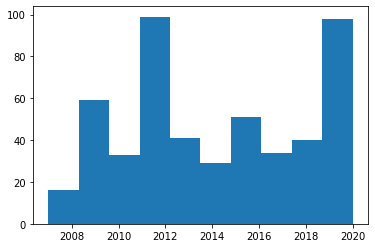

In [20]:
x = aa['year']
plt.hist(x ,bins=10)

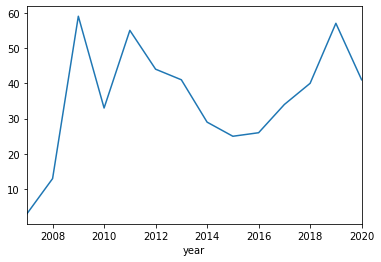

In [21]:

aa.groupby(by ='year').count()['Comment'].plot()

In [22]:
aa[aa.Comment==aa.Comment.max()]

,Tweets,Username,favCount,Comment,year
248,b'Scam artists preying on coronavirus fears by...,b'raybae689',380258,1071699,2014


##หลังจากนั้นเราจะมาทำการตรวจสอบค่าข้อมูลที่หายไปสามารถทำได้โดยใช้ฟังก์ชัน isnull() ร่วมกับ ฟังก์ชัน sum()

In [23]:
aa.isnull().sum()

Tweets      0
Username    0
favCount    0
Comment     0
year        0
dtype: int64

In [24]:
aa.index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

#Reddit

In [0]:
#Information
reddit = praw.Reddit(client_id='YDwUDbaRPmplhw', client_secret='lf-l_DI_lestDXxwa0d6x7eaYLs', user_agent='DataEn_FP')

In [26]:
#เลือก subreddit คำว่า government
subreddit = reddit.subreddit('government')
top_subreddit = subreddit.top(limit=500)

#เลือกข้อมูลที่ต้องการ
topics_dict = { "title":[], 
                "score":[], 
                "id":[], "url":[], 
                "comms_num": [], 
                "created": [], 
                "body":[]}

#วนลูปผ่าน topics_dict เพื่อ append ข้อมูลง datadict
for submission in top_subreddit:
    topics_dict["title"].append(submission.title)
    topics_dict["score"].append(submission.score)
    topics_dict["id"].append(submission.id)
    topics_dict["url"].append(submission.url)
    topics_dict["comms_num"].append(submission.num_comments)
    topics_dict["created"].append(submission.created)
    topics_dict["body"].append(submission.selftext)

#นำลง DataFrame เพื่อทำให้เข้าใจง่าย
topics_data = pd.DataFrame(topics_dict)
topics_data

,title,score,id,url,comms_num,created,body
0,No more out-of-control SWAT raids! | 2 Dogs sh...,99,7y2ol,http://www.dcexaminer.com/opinion/No-more-out-...,12,1.234915e+09,
1,The United States Patriot Act is similar to th...,87,f0azj,http://www.presstv.ir/detail/159376.html,5,1.294794e+09,
2,"""Sarah Palin is the distilled essence of wingn...",88,71ip3,http://www.balloon-juice.com/?p=11290,10,1.221512e+09,
3,"NYTimes: ""We fear it could take months, or yea...",86,7biwn,http://www.nytimes.com/2008/11/04/opinion/04tu...,10,1.225927e+09,
4,NJ Legislation Bans TSA Scanners and Criminali...,70,ewref,http://www.senatenj.com/index.php/doherty/nj-l...,13,1.294284e+09,
...,...,...,...,...,...,...,...
495,Priceless: How The Federal Reserve Bought The ...,22,f81jo,http://www.huffingtonpost.com/2009/09/07/price...,0,1.295904e+09,
496,Ivory Coast president refuses phone call from ...,23,euhmb,http://www.telegraph.co.uk/news/worldnews/afri...,1,1.293900e+09,
497,U.S. Attorney General Eric Holder focuses on p...,23,ei2xs,http://news.firedoglake.com/2010/12/07/holder-...,0,1.291811e+09,
498,Trillions In Secret Fed Bailouts For Global Co...,22,efpqd,http://theeconomiccollapseblog.com/,2,1.291428e+09,


In [27]:
#ฟังก์ชันจัดรูปแบบวัน เวลา 
def get_date(created):
    return dt.datetime.fromtimestamp(created)
_timestamp = topics_data["created"].apply(get_date)
df = topics_data.assign(timestamp = _timestamp)

#บันทึกไฟล์เป็น csv
df.to_csv('RedditFile.csv', index=False) 
df

,title,score,id,url,comms_num,created,body,timestamp
0,No more out-of-control SWAT raids! | 2 Dogs sh...,99,7y2ol,http://www.dcexaminer.com/opinion/No-more-out-...,12,1.234915e+09,,2009-02-17 23:53:41
1,The United States Patriot Act is similar to th...,87,f0azj,http://www.presstv.ir/detail/159376.html,5,1.294794e+09,,2011-01-12 01:01:55
2,"""Sarah Palin is the distilled essence of wingn...",88,71ip3,http://www.balloon-juice.com/?p=11290,10,1.221512e+09,,2008-09-15 20:58:02
3,"NYTimes: ""We fear it could take months, or yea...",86,7biwn,http://www.nytimes.com/2008/11/04/opinion/04tu...,10,1.225927e+09,,2008-11-05 23:09:42
4,NJ Legislation Bans TSA Scanners and Criminali...,70,ewref,http://www.senatenj.com/index.php/doherty/nj-l...,13,1.294284e+09,,2011-01-06 03:21:21
...,...,...,...,...,...,...,...,...
495,Priceless: How The Federal Reserve Bought The ...,22,f81jo,http://www.huffingtonpost.com/2009/09/07/price...,0,1.295904e+09,,2011-01-24 21:13:33
496,Ivory Coast president refuses phone call from ...,23,euhmb,http://www.telegraph.co.uk/news/worldnews/afri...,1,1.293900e+09,,2011-01-01 16:45:15
497,U.S. Attorney General Eric Holder focuses on p...,23,ei2xs,http://news.firedoglake.com/2010/12/07/holder-...,0,1.291811e+09,,2010-12-08 12:30:27
498,Trillions In Secret Fed Bailouts For Global Co...,22,efpqd,http://theeconomiccollapseblog.com/,2,1.291428e+09,,2010-12-04 01:56:53


In [28]:
#สร้างคอลัมน์ปี เพื่อแสดงแต่ละปี
df['year'] = df['timestamp'].dt.year
df

,title,score,id,url,comms_num,created,body,timestamp,year
0,No more out-of-control SWAT raids! | 2 Dogs sh...,99,7y2ol,http://www.dcexaminer.com/opinion/No-more-out-...,12,1.234915e+09,,2009-02-17 23:53:41,2009
1,The United States Patriot Act is similar to th...,87,f0azj,http://www.presstv.ir/detail/159376.html,5,1.294794e+09,,2011-01-12 01:01:55,2011
2,"""Sarah Palin is the distilled essence of wingn...",88,71ip3,http://www.balloon-juice.com/?p=11290,10,1.221512e+09,,2008-09-15 20:58:02,2008
3,"NYTimes: ""We fear it could take months, or yea...",86,7biwn,http://www.nytimes.com/2008/11/04/opinion/04tu...,10,1.225927e+09,,2008-11-05 23:09:42,2008
4,NJ Legislation Bans TSA Scanners and Criminali...,70,ewref,http://www.senatenj.com/index.php/doherty/nj-l...,13,1.294284e+09,,2011-01-06 03:21:21,2011
...,...,...,...,...,...,...,...,...,...
495,Priceless: How The Federal Reserve Bought The ...,22,f81jo,http://www.huffingtonpost.com/2009/09/07/price...,0,1.295904e+09,,2011-01-24 21:13:33,2011
496,Ivory Coast president refuses phone call from ...,23,euhmb,http://www.telegraph.co.uk/news/worldnews/afri...,1,1.293900e+09,,2011-01-01 16:45:15,2011
497,U.S. Attorney General Eric Holder focuses on p...,23,ei2xs,http://news.firedoglake.com/2010/12/07/holder-...,0,1.291811e+09,,2010-12-08 12:30:27,2010
498,Trillions In Secret Fed Bailouts For Global Co...,22,efpqd,http://theeconomiccollapseblog.com/,2,1.291428e+09,,2010-12-04 01:56:53,2010


In [29]:
#แสดงจำนวนรวมของแต่ละปี
df['year'].value_counts()

2010    172
2011    119
2009    114
2008     42
2012     40
2013     11
2014      2
Name: year, dtype: int64

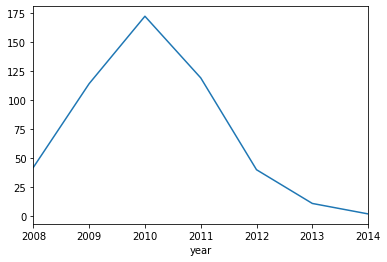

In [30]:
df.groupby(by ='year').count()['comms_num'].plot()

(array([ 42., 114.,   0., 172.,   0., 119.,  40.,   0.,  11.,   2.]),
 array([2008. , 2008.6, 2009.2, 2009.8, 2010.4, 2011. , 2011.6, 2012.2,
        2012.8, 2013.4, 2014. ]),
 <a list of 10 Patch objects>)

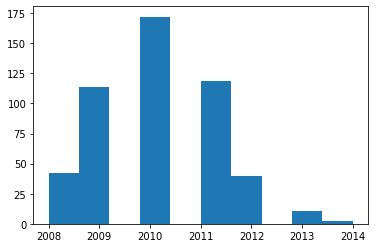

In [31]:
#แสดงความถี่ในแต่ละปี
x = df['year']
plt.hist(x ,bins=10)

In [36]:
df[df.comms_num==df.comms_num.max()]

,title,score,id,url,comms_num,created,body,timestamp,year
205,"The most ""scarily truthful"" words ever spoken ...",33,psi4t,http://youtu.be/fOaCemmsnNk,47,1.329441e+09,,2012-02-17 01:08:20,2012


In [33]:
read=pd.concat([aa,df], axis=1)
read

,Tweets,Username,favCount,Comment,year,title,score,id,url,comms_num,created,body,timestamp,year
0,b'@HEBobiwine Government advised not to have m...,b'Ronnie_nagz',29889,14106,2013,No more out-of-control SWAT raids! | 2 Dogs sh...,99,7y2ol,http://www.dcexaminer.com/opinion/No-more-out-...,12,1.234915e+09,,2009-02-17 23:53:41,2009
1,b'8d.\nThe point of Snowden was to blind the N...,b'CodesUcq',7156,16285,2019,The United States Patriot Act is similar to th...,87,f0azj,http://www.presstv.ir/detail/159376.html,5,1.294794e+09,,2011-01-12 01:01:55,2011
2,"b""@Siya_Bele When people start dying they'll b...",b'Kwazi_786',8830,5167,2019,"""Sarah Palin is the distilled essence of wingn...",88,71ip3,http://www.balloon-juice.com/?p=11290,10,1.221512e+09,,2008-09-15 20:58:02,2008
3,"b'""Especially in a time of emergency, we shoul...",b'BeautyAbounds4U',39056,22919,2016,"NYTimes: ""We fear it could take months, or yea...",86,7biwn,http://www.nytimes.com/2008/11/04/opinion/04tu...,10,1.225927e+09,,2008-11-05 23:09:42,2008
4,b'@Verily_Grey @mattdizwhitlock @ProjectLincol...,b'gdfuego',11631,85877,2008,NJ Legislation Bans TSA Scanners and Criminali...,70,ewref,http://www.senatenj.com/index.php/doherty/nj-l...,13,1.294284e+09,,2011-01-06 03:21:21,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,"b'@iam_ademuyiwa When yawa gass, the federal g...",b'adedirant',23974,26231,2010,Priceless: How The Federal Reserve Bought The ...,22,f81jo,http://www.huffingtonpost.com/2009/09/07/price...,0,1.295904e+09,,2011-01-24 21:13:33,2011
496,b'@ThisIsBsong @Jrancy11 Lmaooo hustle? Like R...,b'Bolajuade',3512,471776,2011,Ivory Coast president refuses phone call from ...,23,euhmb,http://www.telegraph.co.uk/news/worldnews/afri...,1,1.293900e+09,,2011-01-01 16:45:15,2011
497,b'@wdavison10 It seems another era of Protesta...,b'selam_taa',729,698,2020,U.S. Attorney General Eric Holder focuses on p...,23,ei2xs,http://news.firedoglake.com/2010/12/07/holder-...,0,1.291811e+09,,2010-12-08 12:30:27,2010
498,b'The U.K Government is dumb. The Death Toll a...,b'RICOLANI',150354,58995,2013,Trillions In Secret Fed Bailouts For Global Co...,22,efpqd,http://theeconomiccollapseblog.com/,2,1.291428e+09,,2010-12-04 01:56:53,2010


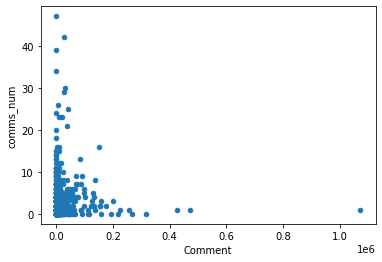

In [34]:
read.plot.scatter(x='Comment',y='comms_num')